### Imports

In [20]:
import os
import numpy as np
import polars as pl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
from IPython.display import display, HTML

### Set data paths

In [11]:
# Load training data
data_path = os.path.join(os.path.dirname(os.getcwd()), "jane-street-real-time-market-data-forecasting")

train = pl.scan_parquet(os.path.join(data_path, "train.parquet")).\
    select(
        pl.int_range(pl.len(), dtype=pl.UInt64).alias("id"),
        pl.all(),
    )

test = pl.scan_parquet(os.path.join(data_path, "test.parquet")).\
    select(
        pl.int_range(pl.len(), dtype=pl.UInt64).alias("id"),
        pl.all(),
    )

test_lags = pl.scan_parquet(os.path.join(data_path, "lags.parquet")).\
    select(
        pl.int_range(pl.len(), dtype=pl.UInt64).alias("id"),
        pl.all(),
    )

### Dataset types

In [12]:
# Get basic information about the dataset
train_schema = train.collect_schema()
train_symbol_count = train.select('symbol_id').unique().collect().height
train_date_count = train.select('date_id').unique().collect().height
train_time_count = train.select('time_id').unique().collect().height

# Display collected information
print("Dataset Information:")
print("-" * 50)
print(f"Number of columns: {len(train_schema)}")
print(f"Number of unique symbol_ids: {train_symbol_count}")
print(f"Number of unique days: {train_date_count}")
print(f"Number of times per day (max): {train_time_count}")
print("\nColumn Types:")
print("-" * 50)

# Group columns by data type
type_groups = {}
for col, dtype in train_schema.items():
    if dtype not in type_groups:
        type_groups[dtype] = []
    type_groups[dtype].append(col)

# Print columns grouped by data type
for dtype, cols in type_groups.items():
    print(f"\n{dtype}:")
    for col in cols:
        print(f"  - {col}")

print("\nNote: These statistics are based on the entire dataset and may take some time to compute.")

Dataset Information:
--------------------------------------------------
Number of columns: 94
Number of unique symbol_ids: 39
Number of unique days: 1699
Number of times per day (max): 968

Column Types:
--------------------------------------------------

UInt64:
  - id

Int16:
  - date_id
  - time_id
  - feature_11

Int8:
  - symbol_id
  - feature_09
  - feature_10

Float32:
  - weight
  - feature_00
  - feature_01
  - feature_02
  - feature_03
  - feature_04
  - feature_05
  - feature_06
  - feature_07
  - feature_08
  - feature_12
  - feature_13
  - feature_14
  - feature_15
  - feature_16
  - feature_17
  - feature_18
  - feature_19
  - feature_20
  - feature_21
  - feature_22
  - feature_23
  - feature_24
  - feature_25
  - feature_26
  - feature_27
  - feature_28
  - feature_29
  - feature_30
  - feature_31
  - feature_32
  - feature_33
  - feature_34
  - feature_35
  - feature_36
  - feature_37
  - feature_38
  - feature_39
  - feature_40
  - feature_41
  - feature_42
  - featur

### Example data and basic stats

In [13]:
# Collect the first x rows
fetch_rows = 6795
train_first_rows = train.fetch(fetch_rows)

# Get stats
train_statistics = train.select(pl.all().exclude(['symbol_id', 'date_id', 'time_id', 'id'])).describe()

/tmp/ipykernel_310962/1295198793.py:3: DeprecationWarning: `LazyFrame.fetch` is deprecated. `LazyFrame.fetch` is deprecated; use `LazyFrame.collect` instead, in conjunction with a call to `head`.
  train_first_rows = train.fetch(fetch_rows)


In [18]:
# Function to create a title with description
def create_title(title):
    return HTML(f"""
    <h3>{title}</h3>
    """)

# First display with truncation
with pl.Config(tbl_rows=16, tbl_cols=-1):
    display(create_title("The first x training rows"))
    display(train_first_rows)


# Second display with all rows shown
with pl.Config(tbl_rows=-1, tbl_cols=-1):
    display(create_title("Statistical Summary of Training Data"))
    display(train_statistics)

id,date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8,partition_id
u64,i16,i16,i8,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,i8,i8,i16,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,i64
0,0,0,1,3.889038,null,null,null,null,null,0.851033,0.242971,0.2634,-0.891687,11,7,76,-0.883028,0.003067,-0.744703,null,-0.169586,null,-1.335938,-1.707803,0.91013,null,1.636431,1.522133,-1.551398,-0.229627,null,null,1.378301,-0.283712,0.123196,null,null,null,0.28118,0.269163,0.349028,-0.012596,-0.225932,null,-1.073602,null,null,-0.181716,null,null,null,0.564021,2.088506,0.832022,null,0.204797,null,null,-0.808103,null,-2.037683,0.727661,null,-0.989118,-0.345213,-1.36224,null,null,null,null,null,-1.251104,-0.110252,-0.491157,-1.02269,0.152241,-0.659864,null,null,-0.261412,-0.211486,-0.335556,-0.281498,0.738489,-0.069556,1.380875,2.005353,0.186018,1.218368,0.775981,0.346999,0.095504,0
1,0,0,7,1.370613,null,null,null,null,null,0.676961,0.151984,0.192465,-0.521729,11,7,76,-0.865307,-0.225629,-0.582163,null,0.317467,null,-1.250016,-1.682929,1.412757,null,0.520378,0.744132,-0.788658,0.641776,null,null,0.2272,0.580907,1.128879,null,null,null,-1.512286,-1.414357,-1.823322,-0.082763,-0.184119,null,null,null,null,null,null,null,null,-10.835207,-0.002704,-0.621836,null,1.172836,null,null,-1.625862,null,-1.410017,1.063013,null,0.888355,0.467994,-1.36224,null,null,null,null,null,-1.065759,0.013322,-0.592855,-1.052685,-0.393726,-0.741603,null,null,-0.281207,-0.182894,-0.245565,-0.302441,2.965889,1.190077,-0.523998,3.849921,2.626981,5.0,0.703665,0.216683,0.778639,0
2,0,0,9,2.285698,null,null,null,null,null,1.056285,0.187227,0.249901,-0.77305,11,7,76,-0.675719,-0.199404,-0.586798,null,-0.814909,null,-1.296782,-2.040234,0.639589,null,1.597359,0.657514,-1.350148,0.364215,null,null,-0.017751,-0.317361,-0.122379,null,null,null,-0.320921,-0.95809,-2.436589,0.070999,-0.245239,null,null,null,null,null,null,null,null,-1.420632,-3.515137,-4.67776,null,0.535897,null,null,-0.72542,null,-2.29417,1.764551,null,-0.120789,-0.063458,-1.36224,null,null,null,null,null,-0.882604,-0.072482,-0.617934,-0.86323,-0.241892,-0.709919,null,null,0.377131,0.300724,-0.106842,-0.096792,-0.864488,-0.280303,-0.326697,0.375781,1.271291,0.099793,2.109352,0.670881,0.772828,0
3,0,0,10,0.690606,null,null,null,null,null,1.139366,0.273328,0.306549,-1.262223,42,5,150,-0.694008,3.004091,0.114809,null,-0.251882,null,-1.902009,-0.979447,0.241165,null,-0.392359,-0.224699,-2.129397,-0.855287,null,null,0.404142,-0.578156,0.105702,null,null,null,0.544138,-0.087091,-1.500147,-0.201288,-0.038042,null,null,null,null,null,null,null,null,0.382074,2.669135,0.611711,null,2.413415,null,null,1.313203,null,-0.810125,2.939022,null,3.988801,1.834661,-1.36224,null,null,null,null,null,-0.697595,1.074309,-0.206929,-0.530602,4.765215,0

statistic,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8,partition_id
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",4.7127338e7,4.3945286e7,4.3945286e7,4.3945286e7,4.3945286e7,4.3945286e7,4.7127338e7,4.7127338e7,4.7127338e7,4.6827091e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.5918039e7,4.7127077e7,4.69255e7,4.7127112e7,4.7127112e7,4.7127338e7,3.8691353e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,3.8691353e7,3.8691353e7,4.7127338e7,4.7127338e7,4.7127338e7,3.8691353e7,4.6648881e7,4.6648881e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7126489e7,4.7127338e7,4.2826689e7,4.7059482e7,4.6034326e7,4.2826689e7,4.7059482e7,4.6034326e7,4.6810175e7,4.6810175e7,4.7127251e7,4.7127338e7,4.7127338e7,4.287324e7,4.7113533e7,4.608244e7,4.287324e7,4.7113533e7,4.608244e7,4.7127112e7,4.7127112e7,4.6648886e7,4.7127338e7,4.7127338e7,4.7127338e7,4.6834511e7,4.6899772e7,4.6889675e7,4.6810175e7,4.6810175e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.6643579e7,4.6643579e7,4.7068908e7,4.7068908e7,4.7107295e7,4.7107295e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7
"""null_count""",0.0,3.182052e6,3.182052e6,3.182052e6,3.182052e6,3.182052e6,0.0,0.0,0.0,300247.0,0.0,0.0,0.0,0.0,0.0,0.0,1.209299e6,261.0,201838.0,226.0,226.0,0.0,8.435985e6,0.0,0.0,0.0,0.0,8.435985e6,8.435985e6,0.0,0.0,0.0,8.435985e6,478457.0,478457.0,0.0,0.0,0.0,849.0,0.0,4.300649e6,67856.0,1.093012e6,4.300649e6,67856.0,1.093012e6,317163.0,317163.0,87.0,0.0,0.0,4.254098e6,13805.0,1.044898e6,4.254098e6,13805.0,1.044898e6,226.0,226.0,478452.0,0.0,0.0,0.0,292827.0,227566.0,237663.0,317163.0,317163.0,0.0,0.0,0.0,0.0,0.0,0.0,483759.0,483759.0,58430.0,58430.0,20043.0,20043.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",2.009445,0.573833,0.010192,0.573102,0.572745,-0.000852,-0.03838,-0.005058,-0.013839,0.082467,32.762992,4.875799,170.69312,-0.038973,-0.026642,-0.041218,-0.251219,-0.20489,-0.242808,-0.008927,-0.031894,-0.209704,0.037687,0.067906,0.072203,0.572287,0.092576,-0.049244,-0.234434,-0.155543,-0.215313,-0.2576,0.036165,0.420549,-0.015209,0.446928,0.445089,0.001806,0.037254,0.045619,0.030084,0.015741,0.041924,-0.063039,-0.053906,-0.080351,0.023377,-0.042955,-0.010571,-0.00172,-0.004013,-0.075708,-0.097575,-0.103892,0.074961,0.048527,0.086814,-0.028328,0.027874,-0.015198,-0.002545,-0.00665,0.012388,-0.179578,-0.145254,-0.166556,-0.043152,-0.050118,-0.042604,-0.023995,-0.040502,-0.032992,-0.021157,-0.036682,-0.016559,-0.023103,-0.002237,-0.008022,-0.00659,-0.012559,-0.001545,-0.000866,-0.000142,-0.01638,-0.012442,-0.016624,-0.002141,0.001476,-0.001114,5.409279
"""std""",1.129388,1.327413,1.084941,1.32287,1.32284

In [19]:
# Collect the first x rows
fetch_rows = 6795
test_first_rows = test.fetch(fetch_rows)
lags_first_rows = test_lags.fetch(fetch_rows)

# First display with truncation
with pl.Config(tbl_rows=16, tbl_cols=-1):  # or whatever default number of rows you want
    display(create_title("The first x test rows"))
    display(test_first_rows)

# First display with truncation
with pl.Config(tbl_rows=16, tbl_cols=-1):  # or whatever default number of rows you want
    display(create_title("The first x lag rows"))
    display(lags_first_rows)

/tmp/ipykernel_310962/398214387.py:3: DeprecationWarning: `LazyFrame.fetch` is deprecated. `LazyFrame.fetch` is deprecated; use `LazyFrame.collect` instead, in conjunction with a call to `head`.
  test_first_rows = test.fetch(fetch_rows)
/tmp/ipykernel_310962/398214387.py:4: DeprecationWarning: `LazyFrame.fetch` is deprecated. `LazyFrame.fetch` is deprecated; use `LazyFrame.collect` instead, in conjunction with a call to `head`.
  lags_first_rows = test_lags.fetch(fetch_rows)


id,row_id,date_id,time_id,symbol_id,weight,is_scored,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78
u64,i64,i16,i16,i8,f32,bool,f32,f32,f32,f32,f32,f32,f32,f32,f32,f64,f64,f64,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32
0,0,0,0,0,3.169998,true,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,null,-0.0,null,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,null,null,0.0,0.0,-0.0,-0.0,-0.0,null,0.0,null,null,-0.0,null,-0.0,0.0,-0.0,0.0,0.0,null,0.0,null,null,-0.0,null,-0.0,0.0,null,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,null,null,0.0,0.0,-0.0,-0.0
1,1,0,0,1,2.165993,true,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,null,-0.0,null,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,null,null,0.0,0.0,0.0,0.0,-0.0,null,0.0,null,null,-0.0,null,-0.0,0.0,0.0,0.0,0.0,null,0.0,null,null,-0.0,null,-0.0,0.0,null,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,null,null,0.0,0.0,0.0,0.0
2,2,0,0,2,3.06555,true,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,null,-0.0,null,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,null,null,0.0,0.0,-0.0,0.0,0.0,null,0.0,null,null,-0.0,null,-0.0,0.0,-0.0,-0.0,-0.0,null,0.0,null,null,-0.0,null,-0.0,0.0,null,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,null,null,0.0,0.0,-0.0,-0.0
3,3,0,0,3,2.698642,true,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,null,-0.0,null,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,null,null,0.0,0.0,-0.0,0.0,0.0,null,0.0,null,null,-0.0,null,-0.0,0.0,-0.0,0.0,-0.0,null,-0.0,null,null,-0.0,null,-0.0,0.0,null,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,null,null,0.0,0.0,-0.0,-0.0
4,4,0,0,4,1.80333,true,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,null,-0.0,null,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,null,null,0.0,0.0,-0.0,0.0,0.0,null,-0.0,null,null,-0.0,null,-0.0,0.0,0.0,0.0,0.0,null,0.0,null,null,-0.0,null,-0.0,0.0,null,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,null,null,0.0,0.0,0.0,0.0
5,5,0,0,5,2.605776,true,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,null,-0.0,null,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,null,null,0.0,0.0,-0.0,0.0,0.0,null,0.0,null,null,0.0,null,-0.0,0.0,-0.0,0.0,0.0,null,0.0,null,null,-0.0,null,-0.0,0.0,null,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,null,null,0.0,0.0,0.0,0.0
6,6,0,0,6,1.047993,true,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,null,-0.0,null,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,null,null,0.0,0.0,-0.0,-0.0,0.0,null,0.0,null,null,0.0,null,-0.0,0.0,-0.0,0.0,-0.0,null,0.0,null,null,0.0,null,-0.0,0.0,null,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,null,null,0.0,0.0,0.0,0.0
7,7,0,0,7,4.231289,true,0.0

id,date_id,time_id,symbol_id,responder_0_lag_1,responder_1_lag_1,responder_2_lag_1,responder_3_lag_1,responder_4_lag_1,responder_5_lag_1,responder_6_lag_1,responder_7_lag_1,responder_8_lag_1
u64,i16,i16,i8,f32,f32,f32,f32,f32,f32,f32,f32,f32
0,0,0,0,-0.442215,-0.322407,0.143594,-0.92689,-0.782236,-0.036595,-1.305746,-0.795677,-0.143724
1,0,0,1,-0.651829,-1.70784,-0.893942,-1.065488,-1.871338,-0.615652,-1.162801,-1.205924,-1.245934
2,0,0,2,-0.656373,-0.264575,-0.892879,-1.511886,-1.03348,-0.378265,-1.57429,-1.863071,-0.027343
3,0,0,3,-0.188186,-0.19097,-0.70149,0.098453,-1.015506,-0.054984,0.329152,-0.965471,0.576635
4,0,0,4,-0.257462,-0.471325,-0.29742,0.074018,-0.324194,-0.597093,0.219856,-0.276356,-0.90479
5,0,0,5,0.027579,-0.020169,0.640348,-0.948373,-0.374251,-0.24035,-0.913801,-0.548867,-1.283726
6,0,0,6,-0.419646,-0.181228,-0.194079,0.667993,0.936857,0.517728,0.896325,1.068884,1.57929
7,0,0,7,-0.114118,-0.198511,-0.200027,-0.410021,-0.135167,-0.182887,-0.492168,-0.142915,-0.202081
…,…,…,…,…,…,…,…,…,…,…,…,…


### Tag meanings

What do the numbers mean Mason?!?!?

#### Feature tags

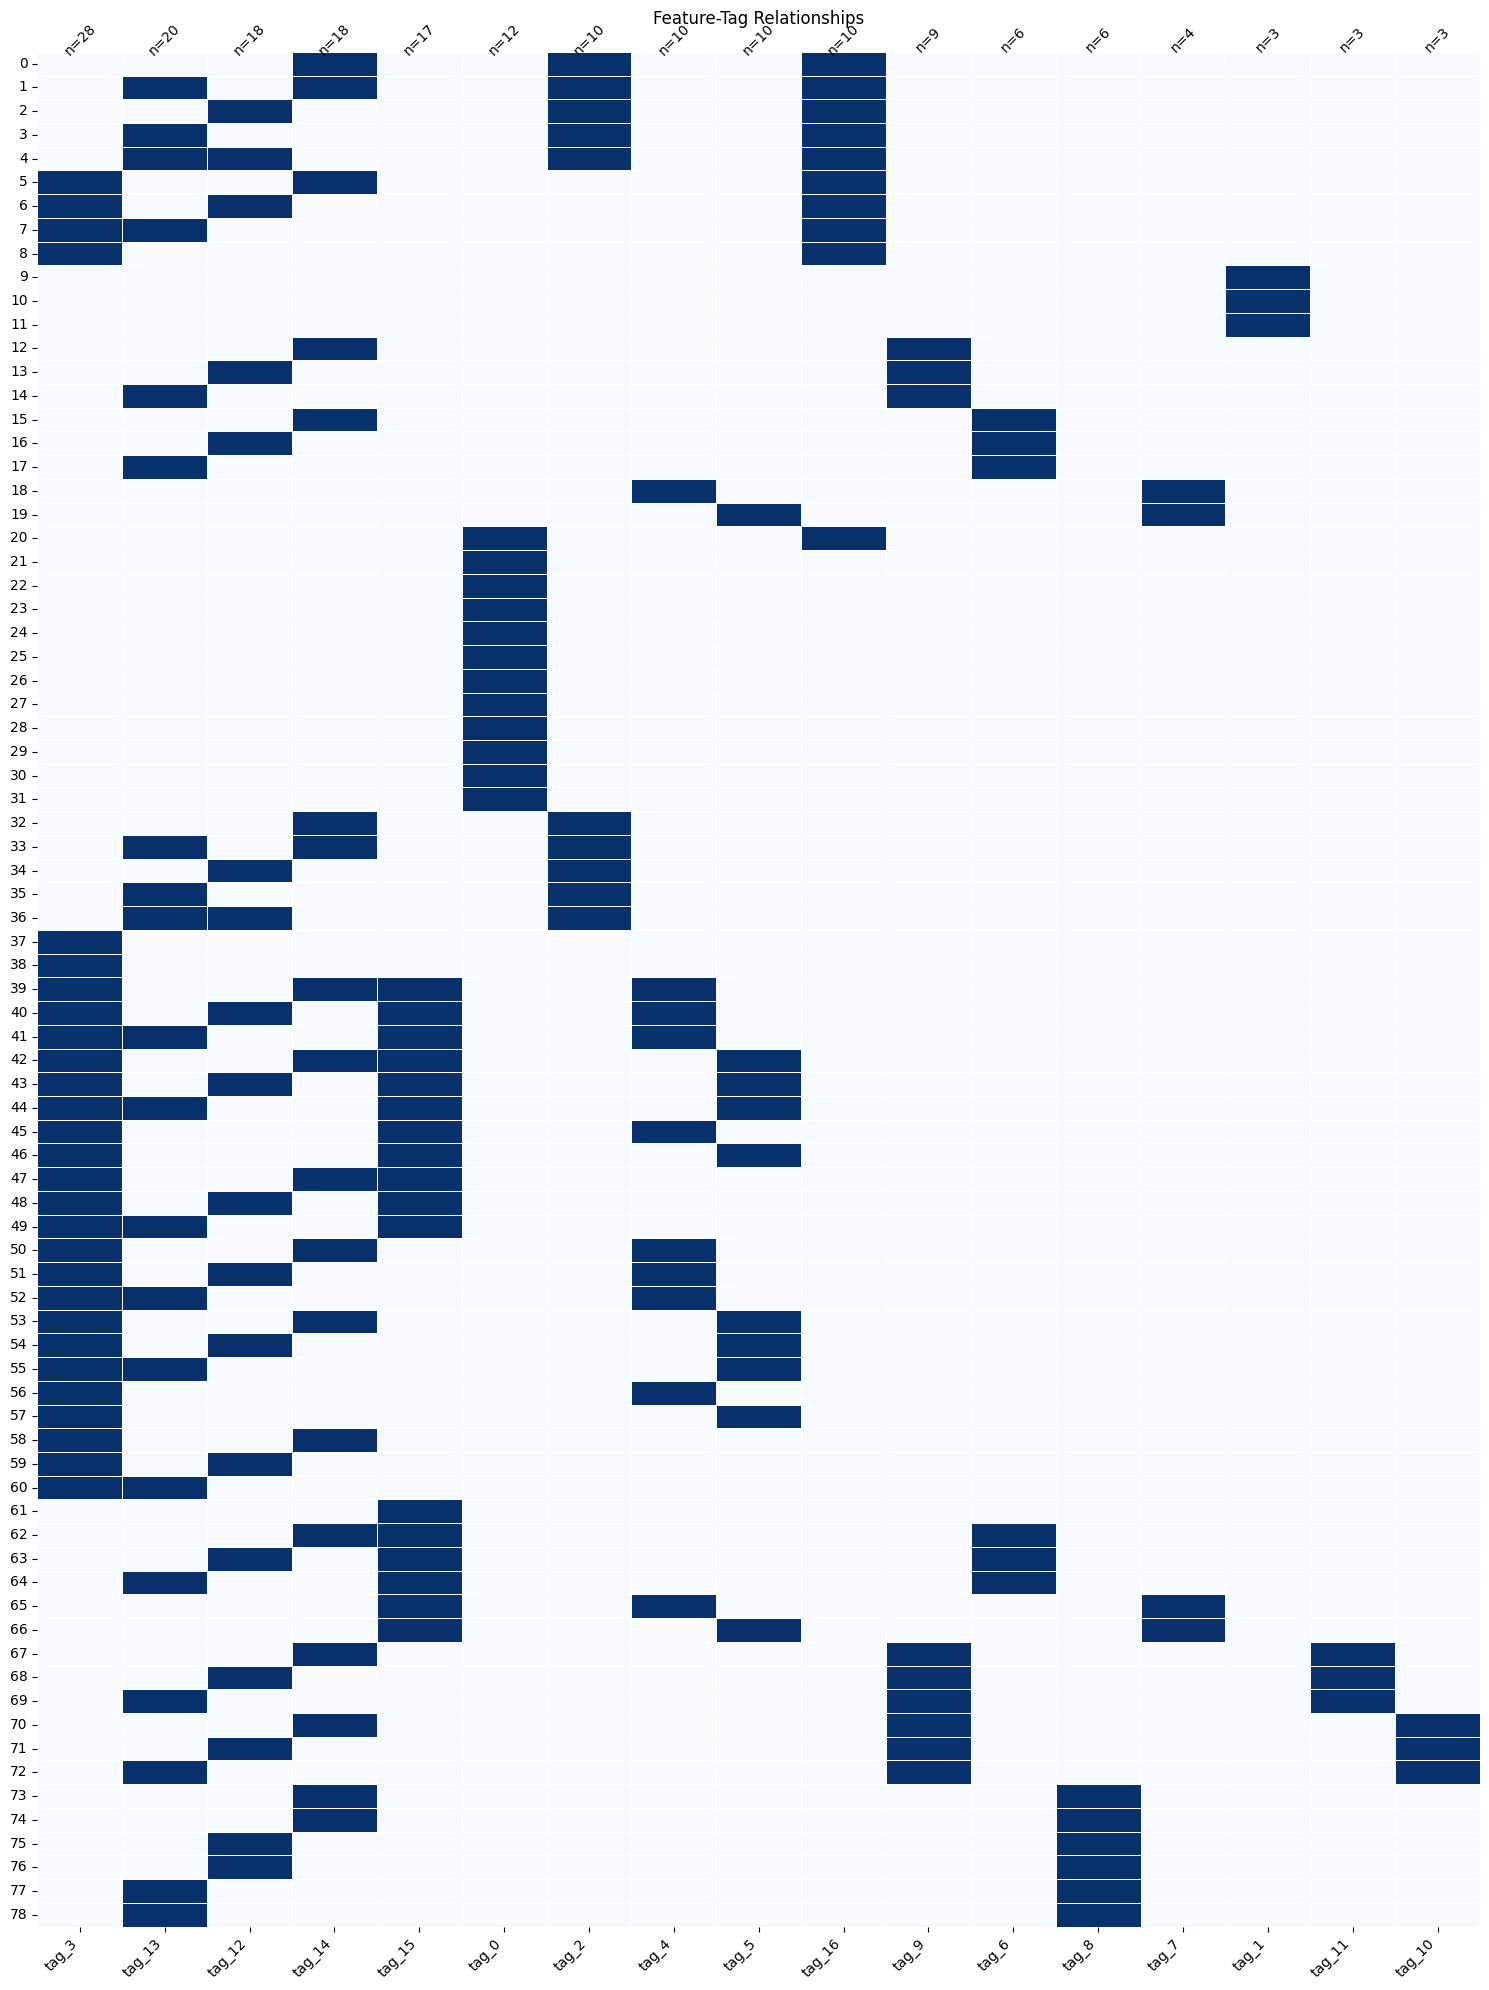

In [22]:
# Load and visualize features
features_df = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()),"jane-street-real-time-market-data-forecasting/features.csv"))

# Get tag counts
tag_counts = features_df.iloc[:, 1:].sum().sort_values(ascending=False)


# Create the plot
plt.figure(figsize=(15, 20))
sns.heatmap(features_df.iloc[:, 1:][tag_counts.index], 
            cmap='Blues',
            cbar=False,
            linewidths=0.5,
            linecolor='white',
            xticklabels=True,
            yticklabels=True)

# Customize the plot
plt.title('Feature-Tag Relationships', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Add tag counts on top of the columns
for i, count in enumerate(tag_counts):
    plt.text(i + 0.5, -0.5, f'n={int(count)}', 
             ha='center', va='center', rotation=45)

plt.tight_layout()
plt.show()

#### Responder tags

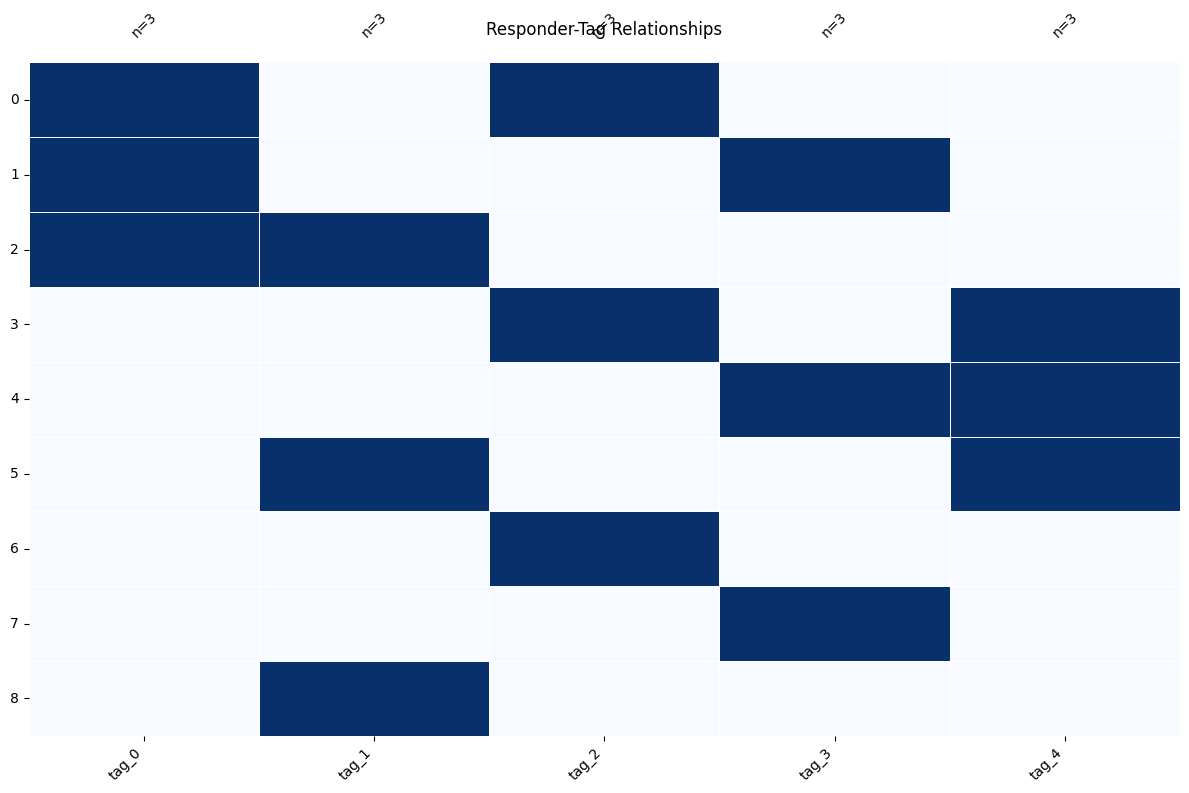

In [23]:
# Load and visualize responders
responders_df = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()),"jane-street-real-time-market-data-forecasting/responders.csv"))

# Get tag counts
tag_counts = responders_df.iloc[:, 1:].sum().sort_values(ascending=False)

# Create the plot
plt.figure(figsize=(12, 8))
sns.heatmap(responders_df.iloc[:, 1:][tag_counts.index], 
            cmap='Blues',
            cbar=False,
            linewidths=0.5,
            linecolor='white',
            xticklabels=True,
            yticklabels=True)

# Customize the plot
plt.title('Responder-Tag Relationships', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Add tag counts on top of the columns
for i, count in enumerate(tag_counts):
    plt.text(i + 0.5, -0.5, f'n={int(count)}', 
             ha='center', va='center', rotation=45)

plt.tight_layout()
plt.show()

### Target Distribution

In [36]:
responder_0 = train.select('responder_0').collect()
responder_1 = train.select('responder_1').collect()
responder_2 = train.select('responder_2').collect()
responder_3 = train.select('responder_3').collect()
responder_4 = train.select('responder_4').collect()
responder_5 = train.select('responder_5').collect()
responder_6 = train.select('responder_6').collect()
responder_7 = train.select('responder_7').collect()
responder_8 = train.select('responder_8').collect()

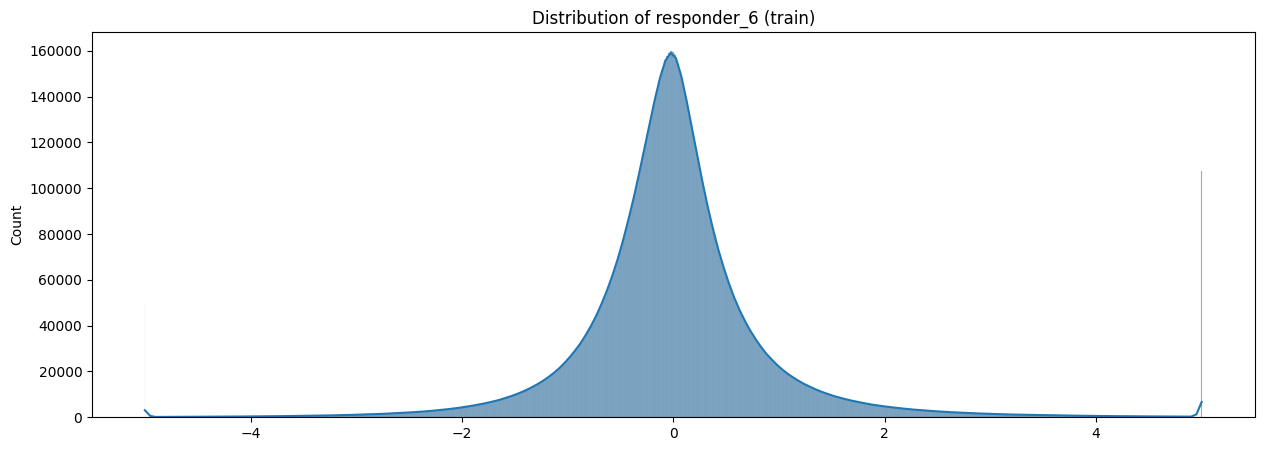

In [26]:
plt.figure(figsize=(15, 5))
sns.histplot(responder_6['responder_6'], kde=True)
plt.title('Distribution of responder_6 (train)')
plt.show()

In [47]:
def plot_cumulative_responder(train, responder_col, use_weights=False, figsize=(15, 6), alpha=0.3):
    # Calculate the values to use (weighted or not)
    if use_weights:
        value_expr = pl.col(responder_col) * pl.col('weight')
        title_prefix = 'Weighted'
    else:
        value_expr = pl.col(responder_col)
        title_prefix = 'Unweighted'

    # Calculate cumulative returns and mean in one go using window functions
    cumulative_data = (train
        .sort(['date_id', 'time_id'])
        .with_columns([
            value_expr
              .cum_sum()
              .over('symbol_id')
              .alias('cumulative_returns'),
            value_expr
              .cum_sum()
              .mean()
              .over(['date_id', 'time_id'])
              .alias('mean_returns')
        ])
        .collect())

    # Create the plot
    plt.figure(figsize=figsize)

    # Get unique symbols
    unique_symbols = cumulative_data['symbol_id'].unique()
    filtered_data = cumulative_data.filter(pl.col('symbol_id').is_in(unique_symbols))

    # Plot each symbol with different colors
    for symbol in unique_symbols:
        symbol_data = filtered_data.filter(pl.col('symbol_id') == symbol)
        plt.plot(symbol_data['cumulative_returns'], alpha=alpha, linewidth=1)

    plt.title(f'{title_prefix} Cumulative Returns by Symbol for {responder_col}')
    plt.xlabel('Time Steps')
    plt.ylabel('Cumulative Return')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

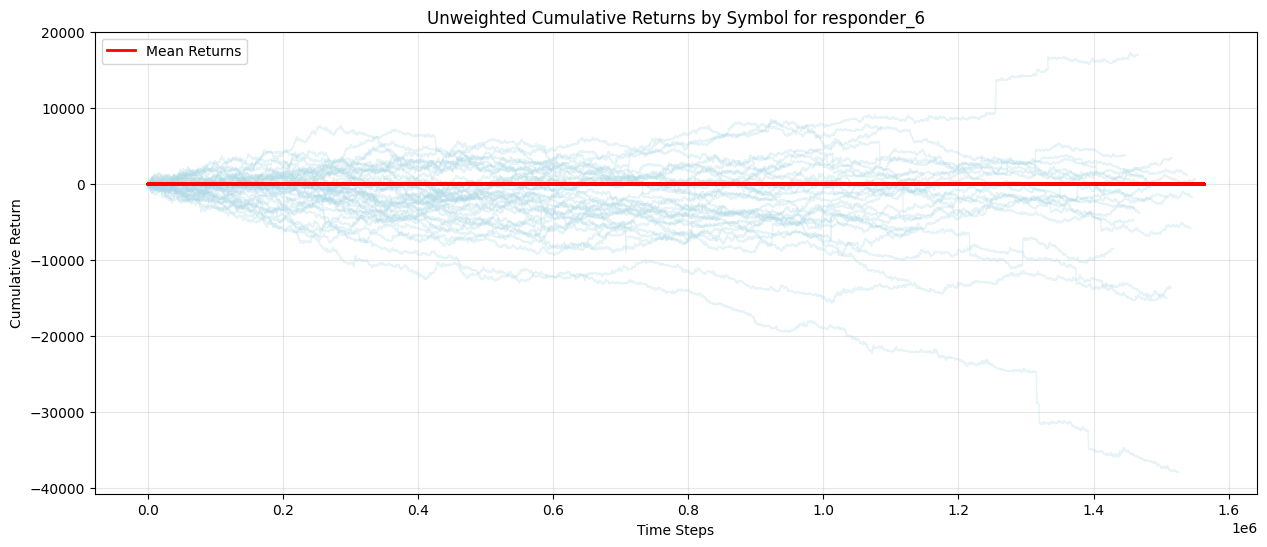

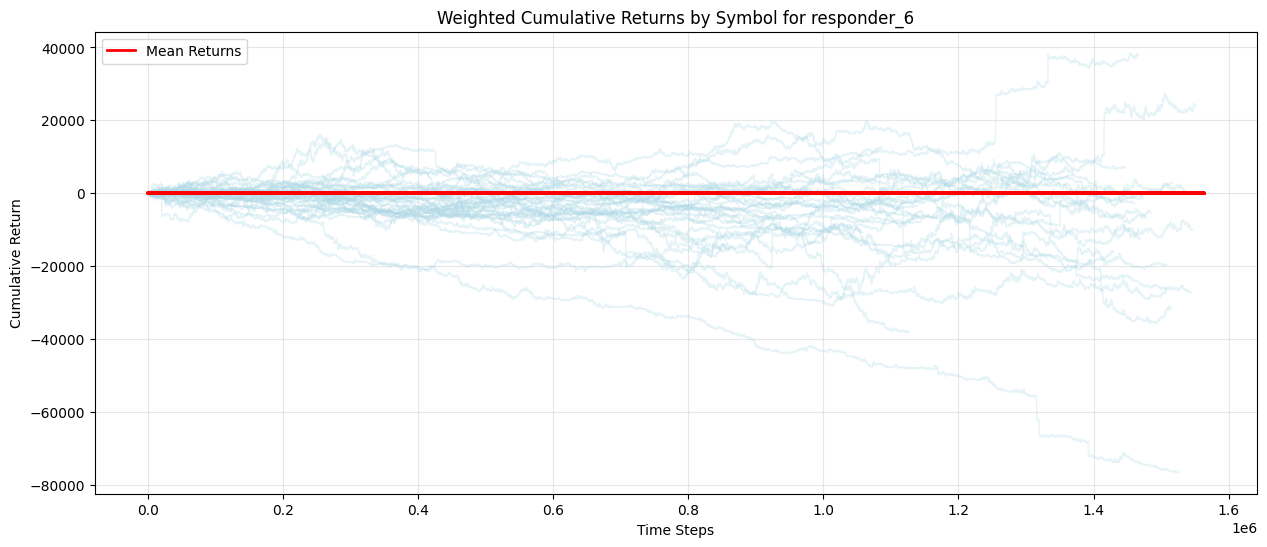

In [49]:
plot_cumulative_responder(train, 'responder_6', use_weights=False)
plot_cumulative_responder(train, 'responder_6', use_weights=True)

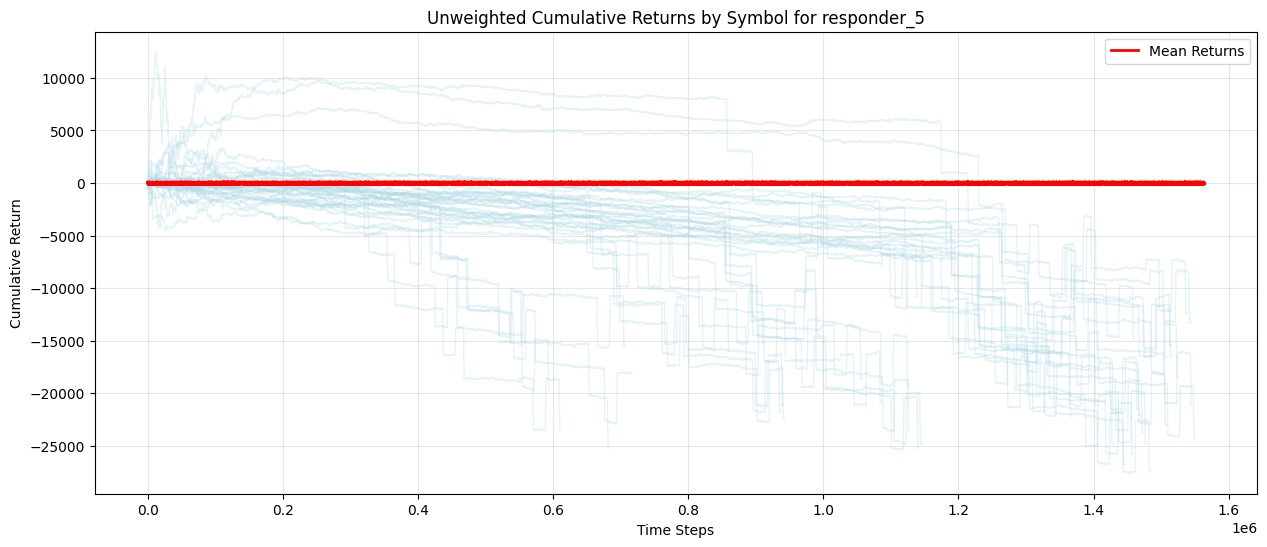

In [ ]:
plot_cumulative_responder(train, 'responder_5', use_weights=False)
plot_cumulative_responder(train, 'responder_5', use_weights=True)

## Correlations

### Non-time series correlation

In [23]:
def get_target_correlations(lazy_df, feature_cols, target_col):
    correlations = []
    
    with tqdm(total=len(feature_cols), desc="Computing correlations") as pbar:
        for feature in feature_cols:
            corr = lazy_df.select(pl.corr(feature, target_col)).collect().item()
            correlations.append((feature, corr))
            pbar.update(1)
    
    return sorted(correlations, key=lambda x: abs(x[1]), reverse=True)

In [ ]:
# Get feature columns
feature_cols = [col for col in train.columns]
target_col = 'responder_6'

# Compute correlations with progress bar
print("Starting correlation computation with target variable...")
target_correlations = get_target_correlations(train, feature_cols, target_col)

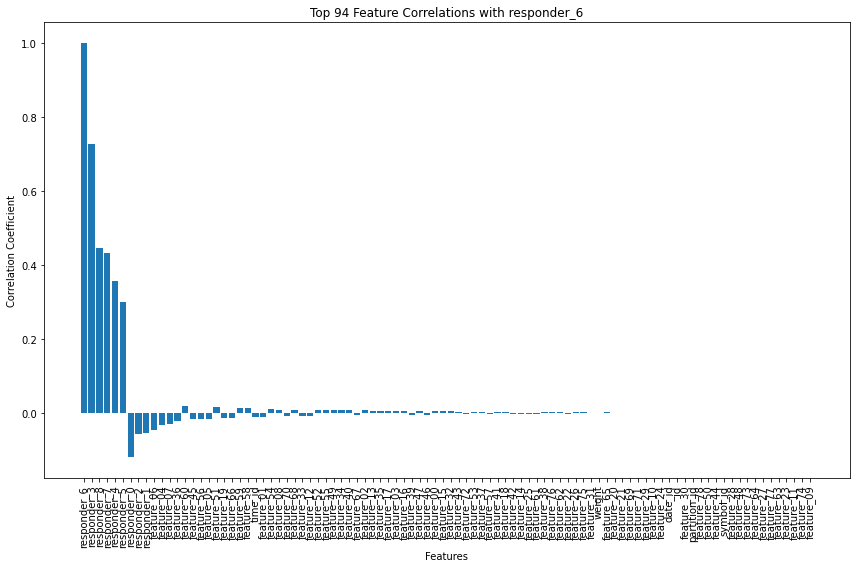

In [39]:

def plot_top_correlations(correlations, n=94):
    top_n = correlations[:n]
    features, corrs = zip(*top_n)
    
    plt.figure(figsize=(12, 8))
    plt.bar(features, corrs)
    plt.xticks(rotation=90)
    plt.title(f'Top {n} Feature Correlations with responder_6')
    plt.xlabel('Features')
    plt.ylabel('Correlation Coefficient')
    plt.tight_layout()
    plt.show()

plot_top_correlations(target_correlations)

### Time series - lagged correlations

In [11]:
def compute_lagged_correlations(df: pl.LazyFrame, feature_cols: list, target_col: str, max_lag: int = 5) -> pl.DataFrame:
    """
    Compute lagged correlations between features and target for a LazyFrame, excluding NaN correlations.
    
    Args:
    df (pl.LazyFrame): Input LazyFrame
    feature_cols (list): List of feature column names
    target_col (str): Name of the target column
    max_lag (int): Maximum lag to consider
    
    Returns:
    pl.DataFrame: Dataframe of average correlations, correlation counts, and NaN counts
    """
    correlations = []
    
    # Get unique date_ids
    unique_dates = df.select(pl.col('date_id').unique()).collect().to_series().sort()
    
    for date_id in tqdm(unique_dates, desc="Processing dates"):
        # Filter data for the current date
        day_data = df.filter(pl.col('date_id') == date_id)
        
        for feature in feature_cols:
            for lag in range(1, max_lag + 1):
                feature_lag_key = f"{feature}_lag{lag}"
                
                # Compute correlation between lagged feature and target
                corr = day_data.select([
                    pl.corr(pl.col(feature).shift(lag), pl.col(target_col)).alias('correlation')
                ]).collect().item()
                
                correlations.append((feature_lag_key, date_id, corr))
    
    # Convert correlations to DataFrame and compute statistics
    corr_df = pl.DataFrame(correlations, schema=['feature_lag', 'date_id', 'correlation'])
    
    result = (corr_df
        .lazy()
        .group_by('feature_lag')
        .agg([
            pl.col('correlation').mean().alias('avg_correlation'),
            pl.col('correlation').count().alias('total_count'),
            pl.col('correlation').filter(pl.col('correlation').is_not_nan()).count().alias('valid_count')
        ])
        .with_columns([
            (pl.col('valid_count') / pl.col('total_count') * 100).alias('valid_percentage'),
            (pl.col('total_count') - pl.col('valid_count')).alias('nan_count')
        ])
        .sort('avg_correlation', descending=True)
        .collect()
    )
    
    return result


In [22]:
# Usage
# Get feature columns without triggering the performance warning
feature_cols = [col for col in train.collect_schema().names() if col.startswith('responder_6') or col.startswith('responder_3') or col.startswith('responder_8') or col.startswith('responder_7')]
target_col = 'responder_6'
max_lag = 2

print("Computing lagged correlations...")
lagged_correlations = compute_lagged_correlations(train, feature_cols, target_col, max_lag)

Computing lagged correlations...


Processing dates: 100%|██████████| 1699/1699 [02:51<00:00,  9.92it/s]
/monfs01/projects/ys68/v_envs/pyenv/versions/3.10.14/lib/python3.10/functools.py:889: DataOrientationWarning: Row orientation inferred during DataFrame construction. Explicitly specify the orientation by passing `orient="row"` to silence this warning.
  return dispatch(args[0].__class__)(*args, **kw)


In [24]:
# Display the results
print(lagged_correlations)

shape: (8, 6)
┌──────────────────┬─────────────────┬─────────────┬─────────────┬──────────────────┬───────────┐
│ feature_lag      ┆ avg_correlation ┆ total_count ┆ valid_count ┆ valid_percentage ┆ nan_count │
│ ---              ┆ ---             ┆ ---         ┆ ---         ┆ ---              ┆ ---       │
│ str              ┆ f64             ┆ u32         ┆ u32         ┆ f64              ┆ u32       │
╞══════════════════╪═════════════════╪═════════════╪═════════════╪══════════════════╪═══════════╡
│ responder_6_lag1 ┆ 0.052003        ┆ 1699        ┆ 1699        ┆ 100.0            ┆ 0         │
│ responder_6_lag2 ┆ 0.051005        ┆ 1699        ┆ 1699        ┆ 100.0            ┆ 0         │
│ responder_3_lag1 ┆ 0.044731        ┆ 1699        ┆ 1699        ┆ 100.0            ┆ 0         │
│ responder_3_lag2 ┆ 0.042984        ┆ 1699        ┆ 1699        ┆ 100.0            ┆ 0         │
│ responder_8_lag1 ┆ 0.033432        ┆ 1699        ┆ 1699        ┆ 100.0            ┆ 0         │
│ resp